# 📘 Laboratory Practice III – Practical 5

**Name:** Anuj Sachin Dhole  
**Roll No:** B21042  
**Class:** BE CE A  
**Subject:** Laboratory Practice III (Machine Learning)

---

## 🧪 Practical 5

### 🎯 Problem Statement:
Implement the **K-Nearest Neighbors (KNN)** classification algorithm on the **Diabetes dataset** and evaluate its performance using classification metrics.

---

### ✅ Tasks to Perform:

1. **Load and pre-process the dataset.**  
2. **Perform feature scaling using Min-Max Scaler.**  
3. **Split the dataset into training and testing sets.**  
4. **Apply the K-Nearest Neighbors (KNN) algorithm.**  
5. **Generate predictions on the test set.**  
6. **Compute and display the Confusion Matrix.**  
7. **Evaluate the model using the following metrics:**
   - Accuracy  
   - Error Rate  
   - Precision  
   - Recall  
8. **Visualize the confusion matrix using `ConfusionMatrixDisplay`.**

---

### 📂 Dataset:

**Source:** [Diabetes Dataset on Kaggle](https://www.kaggle.com/datasets/abdallamahgoub/diabetes)  
**File Used:** `diabetes.csv`


# Step 1: Import Libraries


In [2]:
pip install --upgrade scikit-learn --user
# You are using an old version of sklearn. 2 methods you can perform your task:
# Update Library using this command:
#for importing ConfusionMatrixDisplay

Requirement already up-to-date: scikit-learn in c:\users\mba1 pc-17\appdata\roaming\python\python37\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report, 
    ConfusionMatrixDisplay 
)

# Step 2: Load Dataset

In [4]:
df = pd.read_csv('diabetes.csv')  
print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


# Step 3: Split Features and Target

In [5]:
X = df.drop('Outcome', axis=1)   # Features
y = df['Outcome']                # Target variable (0 or 1)

# Step 4: Feature Scaling using Min-Max

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Step 5: Train-Test Split (Cross Validation)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Initialize and Train KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Step 7: Make Predictions

In [9]:
y_pred = knn.predict(X_test)

# Step 8: Evaluate the Model

In [10]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Step 9: Display Evaluation Results

In [11]:
print("\n--- Evaluation Metrics ---")
print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy   : {accuracy:.4f}")
print(f"Error Rate : {error_rate:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")



--- Evaluation Metrics ---

Confusion Matrix:
 [[78 21]
 [27 28]]

Accuracy   : 0.6883
Error Rate : 0.3117
Precision  : 0.5714
Recall     : 0.5091


# Step 10: Classification Report

In [12]:
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



# Step 11: Confusion Matrix Heatmap

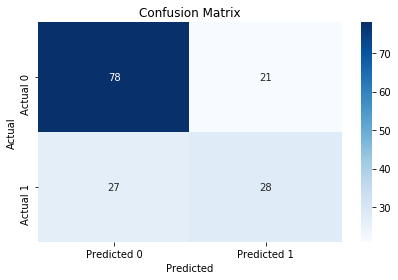

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# OR

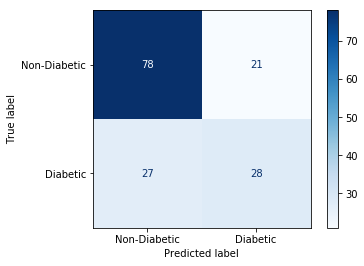

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')

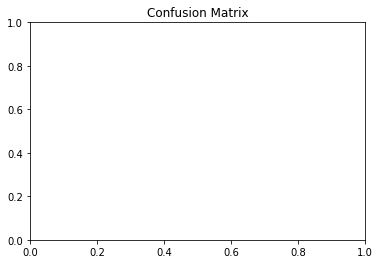

In [17]:
# Show the plot
plt.title("Confusion Matrix")
plt.show()

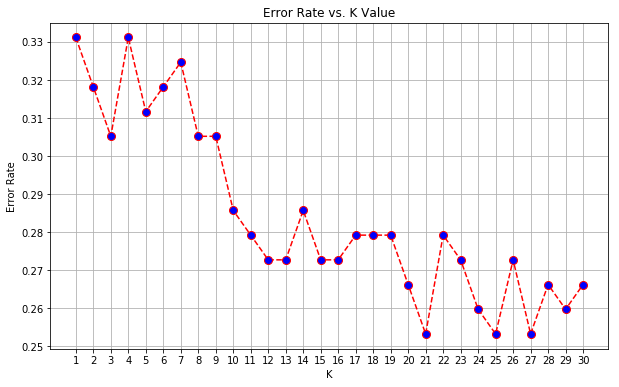

In [18]:
error_rate = []

# Try k values from 1 to 30
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rate.append(error)

# Plotting the error rate vs k value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xticks(range(1, 31))
plt.show()